In [49]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from keras import layers                                                                         
from keras.layers import Conv2D,Dense,Flatten,Dropout,MaxPooling2D,BatchNormalization,Activation
from keras.models import Sequential
from keras.utils import to_categorical
from keras.regularizers import l2
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam
from keras.metrics import Recall, Accuracy,Precision
from keras.layers import DepthwiseConv2D
from PIL import Image
import seaborn as sns


In [50]:
import sklearn
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
img = []
for label in range(len(class_labels)):
  index = (y_train == label).argmax()
  image = x_train[index]
  label = y_train[index][0]
  img.append((image,label))

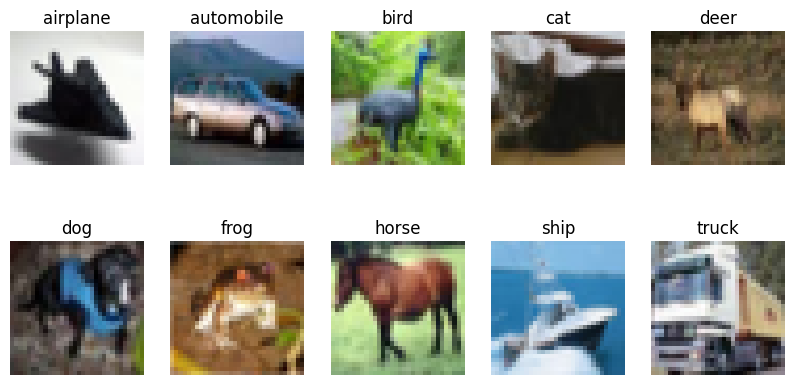

In [ ]:
plt.figure(figsize=(10,5))
for i, (image,label) in enumerate(img):
  plt.subplot(2,5,i+1)
  plt.imshow(image)
  plt.title(class_labels[label])
  plt.axis('off')

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [ ]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=30)

In [ ]:
print('X_train Shape',x_train.shape)
print('X_test Shape',x_test.shape)
print('Y_train Shape', y_train.shape)
print('Y_test Shape', y_test.shape)

X_train Shape (40000, 32, 32, 3)
X_test Shape (10000, 32, 32, 3)
Y_train Shape (40000, 10)
Y_test Shape (10000, 10)


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [ ]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
1250/1250 [==============================] - 27s 9ms/step - loss: 1.6785 - accuracy: 0.4212 - val_loss: 1.3952 - val_accuracy: 0.5121
Epoch 2/50
1250/1250 [==============================] - 11s 9ms/step - loss: 1.1456 - accuracy: 0.5914 - val_loss: 1.0304 - val_accuracy: 0.6408
Epoch 3/50
1250/1250 [==============================] - 11s 9ms/step - loss: 0.9550 - accuracy: 0.6650 - val_loss: 0.8541 - val_accuracy: 0.6999
Epoch 4/50
1250/1250 [==============================] - 11s 9ms/step - loss: 0.8505 - accuracy: 0.7041 - val_loss: 0.9506 - val_accuracy: 0.6695
Epoch 5/50
1250/1250 [==============================] - 11s 9ms/step - loss: 0.7714 - accuracy: 0.7342 - val_loss: 0.7929 - val_accuracy: 0.7247
Epoch 6/50
1250/1250 [==============================] - 11s 9ms/step - loss: 0.7176 - accuracy: 0.7558 - val_loss: 0.7114 - val_accuracy: 0.7599
Epoch 7/50
1250/1250 [==============================] - 13s 10ms/step - loss: 0.6629 - accuracy: 0.7736 - val_loss: 0.6190 - val_a

In [ ]:
evaluation = model.evaluate(x_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.4860 - accuracy: 0.8579
Test Accuracy: 0.8579000234603882


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
!pwd

/content


In [ ]:
%cd /content/gdrive/MyDrive

/content/gdrive/MyDrive


In [ ]:
h = model.save('weights.h5')

In [ ]:
model.save('/content/gdrive/MyDrive/my_model')

In [ ]:
new_model = tf.keras.models.load_model('/content/gdrive/MyDrive/my_model')

In [ ]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [ ]:
loss, acc = new_model.evaluate(x_test, y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

313/313 - 1s - loss: 0.4860 - accuracy: 0.8579 - 1s/epoch - 4ms/step
Restored model, accuracy: 85.79%


In [ ]:
# Making the Predictions
pred = new_model.predict(x_test)
print(pred)

# Converting the predictions into label index 
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

313/313 [==============================] - 1s 3ms/step
[[5.4863012e-06 2.1438573e-06 2.1422366e-04 ... 1.6680286e-06
  4.0659525e-06 1.2048242e-06]
 [4.8525098e-06 2.7526392e-05 4.7319641e-11 ... 1.3608341e-11
  9.9996746e-01 6.9317153e-08]
 [2.2694911e-04 2.3298841e-02 4.2344677e-06 ... 9.0578618e-07
  9.7633070e-01 1.1830196e-04]
 ...
 [5.1773014e-07 5.1441197e-07 9.4767551e-05 ... 1.7532225e-03
  2.0191296e-06 2.8839295e-06]
 [1.5094990e-04 9.9979252e-01 7.0713209e-06 ... 7.5808106e-07
  1.2979378e-06 1.3292264e-05]
 [6.9187607e-09 2.1805072e-07 2.3809955e-07 ... 9.9969196e-01
  3.1063582e-10 6.1275434e-09]]
[3 8 8 ... 5 1 7]


In [55]:
pred_classes.shape

(10000,)

In [59]:
y_test.shape

(10000, 10)

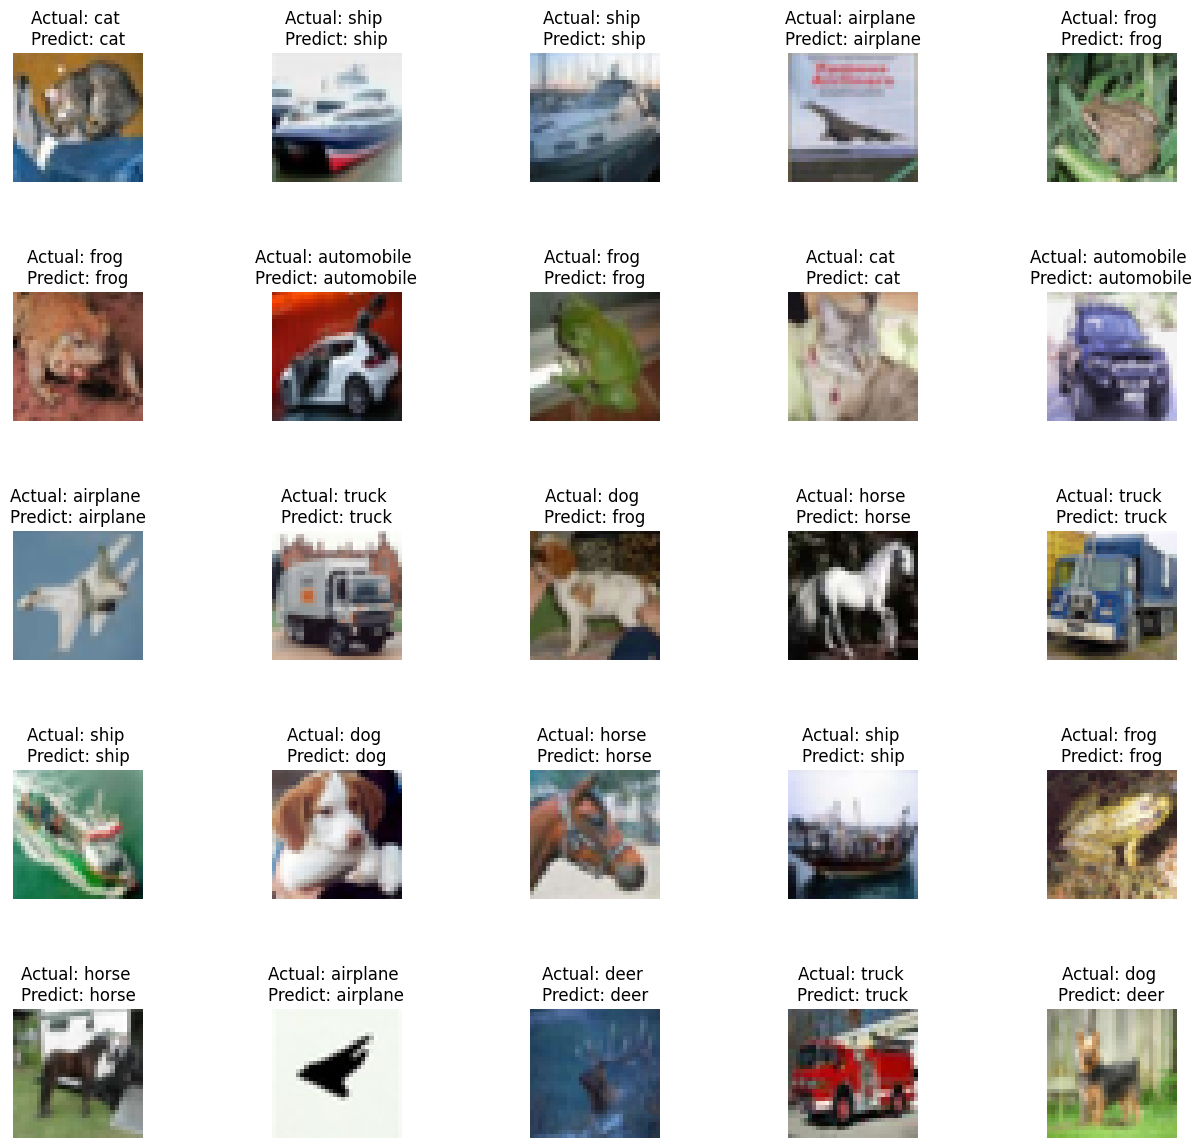

In [52]:
(# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(x_test[i])
    axes[i].set_title("Actual: %s \nPredict: %s" % (class_labels[np.argmax(y_test[i])], class_labels[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [68]:
y_true_classes = np.argmax(y_test, axis=1)

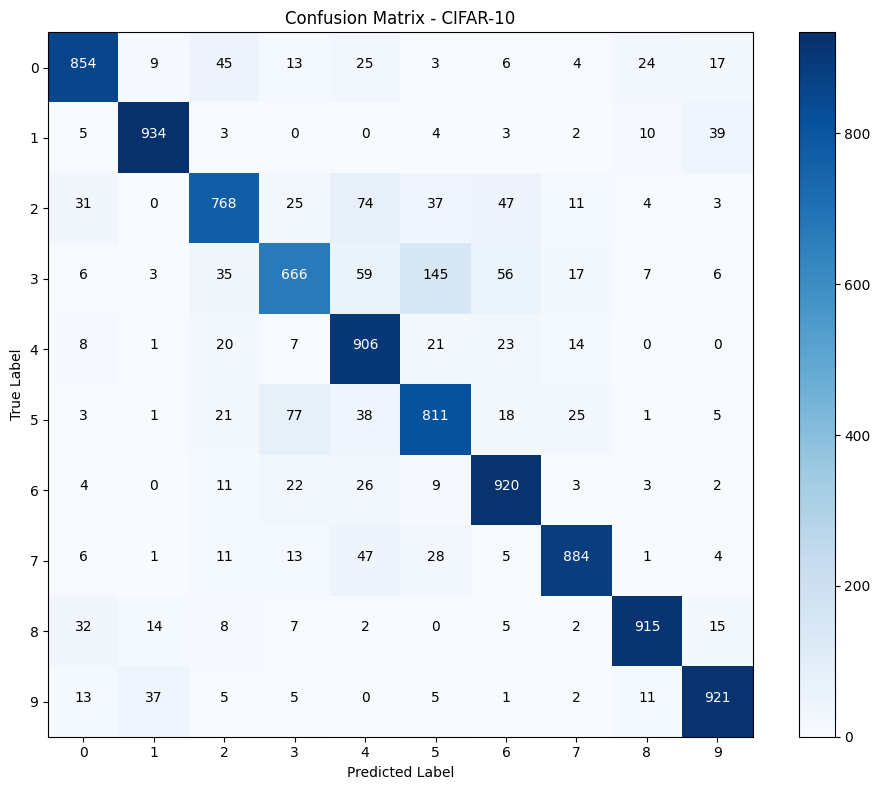

In [74]:
confusion_mtx = confusion_matrix(y_true_classes, pred_classes)
plt.figure(figsize=(10, 8))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - CIFAR-10')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
thresh = confusion_mtx.max() / 2.
for i in range(10):
    for j in range(10):
        plt.text(j, i, format(confusion_mtx[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion_mtx[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

In [71]:
y_test.dtype

dtype('float32')

In [73]:
from sklearn.metrics import classification_report

# Assuming you have obtained y_pred_labels and y_true_labels as mentioned before

# Generate the classification report
report = classification_report(y_true_classes, pred_classes)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1000
           1       0.93      0.93      0.93      1000
           2       0.83      0.77      0.80      1000
           3       0.80      0.67      0.73      1000
           4       0.77      0.91      0.83      1000
           5       0.76      0.81      0.79      1000
           6       0.85      0.92      0.88      1000
           7       0.92      0.88      0.90      1000
           8       0.94      0.92      0.93      1000
           9       0.91      0.92      0.92      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

